In [ ]:
from google.colab import files
files.upload()

Saving data (2).zip to data (2).zip


In [ ]:
!unzip  data1_moi.zip

In [ ]:
from collections import defaultdict

import matplotlib.pyplot as plt

import hashlib

from keras.models import model_from_json
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from sklearn.utils import shuffle

In [ ]:
def count_images_per_label(root_folder):
    label_counts = defaultdict(int)
    for label in os.listdir(root_folder):
        label_folder = os.path.join(root_folder, label)
        if os.path.isdir(label_folder):
            label_counts[label] = len(os.listdir(label_folder))
    return label_counts

# Dùng
counts = count_images_per_label(r"/content/data")
for label, count in sorted(counts.items()):
    print(f"Label {label}: {count} images")


Label (: 14294 images
Label ): 14355 images
Label +: 25112 images
Label -: 33997 images
Label 0: 6914 images
Label 1: 26520 images
Label 2: 26141 images
Label 3: 10909 images
Label 4: 7396 images
Label 5: 3545 images
Label 6: 3118 images
Label 7: 2909 images
Label 8: 3068 images
Label 9: 3737 images
Label div: 868 images
Label times: 3251 images


In [ ]:

def find_duplicate_images(folder):
    hashes = {}
    duplicates = []
    for label in os.listdir(folder):
        path = os.path.join(folder, label)
        for fname in os.listdir(path):
            img = cv2.imread(os.path.join(path, fname), cv2.IMREAD_GRAYSCALE)
            if img is None: continue
            h = hashlib.md5(img.tobytes()).hexdigest()
            if h in hashes:
                duplicates.append((hashes[h], os.path.join(path, fname)))
            else:
                hashes[h] = os.path.join(path, fname)
    return duplicates
dups = find_duplicate_images("/content/data")
print(f"Found {len(dups)} duplicates")
for a, b in dups[:5]:
    print(f"Duplicate pair:\n {a}\n {b}")


Found 143448 duplicates
Duplicate pair:
 /content/data/-/-_7327.jpg
 /content/data/-/exp31940.jpg
Duplicate pair:
 /content/data/-/-_7327.jpg
 /content/data/-/exp93750.jpg
Duplicate pair:
 /content/data/-/-_7327.jpg
 /content/data/-/exp30988.jpg
Duplicate pair:
 /content/data/-/-_7327.jpg
 /content/data/-/exp10077.jpg
Duplicate pair:
 /content/data/-/-_7327.jpg
 /content/data/-/exp31834.jpg


In [ ]:
for _, dup_path in dups:
    os.remove(dup_path)


In [ ]:
def count_images_per_label(root_folder):
    label_counts = defaultdict(int)
    for label in os.listdir(root_folder):
        label_folder = os.path.join(root_folder, label)
        if os.path.isdir(label_folder):
            label_counts[label] = len(os.listdir(label_folder))
    return label_counts

counts = count_images_per_label(r"/content/data")
for label, count in sorted(counts.items()):
    print(f"Label {label}: {count} images")


Label (: 3985 images
Label ): 3978 images
Label +: 5443 images
Label -: 6022 images
Label 0: 1810 images
Label 1: 6326 images
Label 2: 6210 images
Label 3: 2469 images
Label 4: 1640 images
Label 5: 1008 images
Label 6: 812 images
Label 7: 753 images
Label 8: 731 images
Label 9: 742 images
Label div: 157 images
Label times: 600 images


In [ ]:
import shutil

shutil.make_archive('data1', 'zip', 'data')

'/content/data1.zip'

In [ ]:
def check_bad_images(folder):
    bad_images = []
    for label in os.listdir(folder):
        path = os.path.join(folder, label)
        for fname in os.listdir(path):
            img_path = os.path.join(path, fname)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None: continue
            h, w = img.shape
            mean = np.mean(img)
            if mean > 245 or mean < 10 or h < 10 or w < 10:
                bad_images.append((img_path, mean, h, w))
    return bad_images
bad_images = check_bad_images(r"/content/data")
print(f"Found {len(bad_images)} bad images.")

for i, (path, mean, h, w) in enumerate(bad_images[:5]):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap='gray')
    plt.title(f"{os.path.basename(path)}\nmean={mean:.2f}, size={h}x{w}")
    plt.axis('off')
    plt.show()


In [ ]:
from skimage.feature import hog
def get_features(img):
    return hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False)

def find_outliers(images):
    features = [get_features(img) for img in images]
    features = np.array(features)

    mean_feat = np.mean(features, axis=0)
    distances = np.linalg.norm(features - mean_feat, axis=1)

    threshold = np.mean(distances) + 3 * np.std(distances)

    outlier_indices = np.where(distances > threshold)[0]
    return outlier_indices
def load_images_in_label_folder(folder_path):
    imgs = []
    filenames = []
    for f in os.listdir(folder_path):
        path = os.path.join(folder_path, f)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (45, 45))  # resize giống ảnh train
            imgs.append(img)
            filenames.append(f)
    return imgs, filenames
def show_outliers(images, filenames, indices, label, folder_path, save_file='outliers.txt'):
    print(f"Label: {label} - Số outliers: {len(indices)}")

    with open(save_file, 'a') as f:
        for idx in indices:
            plt.imshow(images[idx], cmap='gray')
            plt.title(f"{filenames[idx]}")
            plt.axis('off')
            plt.show()

            path = os.path.join(folder_path, filenames[idx])
            f.write(path + '\n')
            print(f"Đã lưu: {path}")



Label: 3 - Số outliers: 16


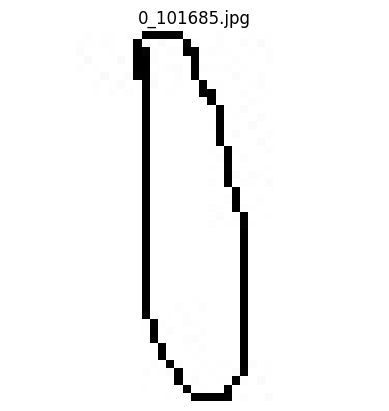

Đã lưu: /content/data1_0+-()/0/0_101685.jpg


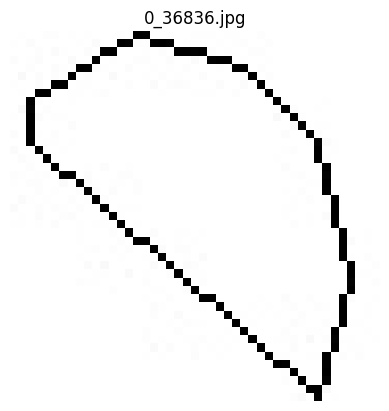

Đã lưu: /content/data1_0+-()/0/0_36836.jpg


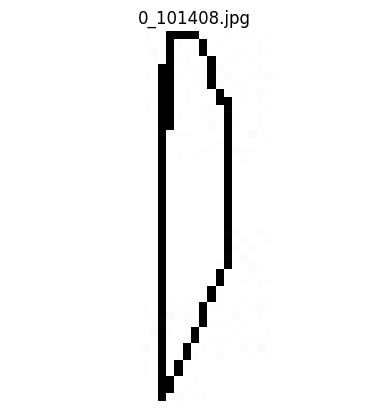

Đã lưu: /content/data1_0+-()/0/0_101408.jpg


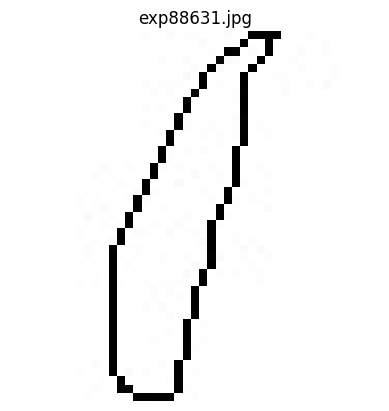

Đã lưu: /content/data1_0+-()/0/exp88631.jpg


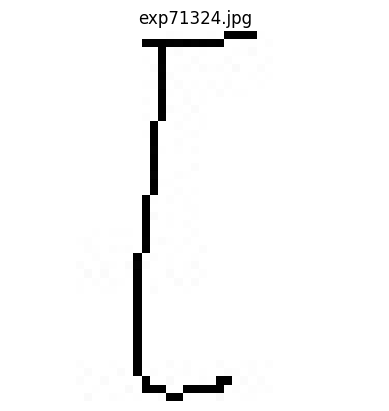

Đã lưu: /content/data1_0+-()/0/exp71324.jpg


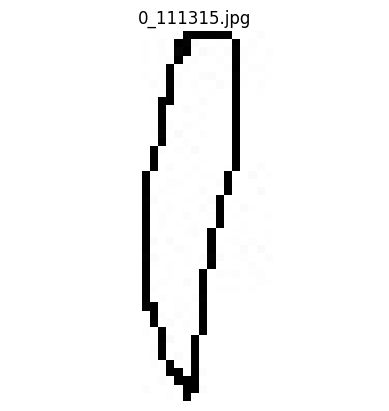

Đã lưu: /content/data1_0+-()/0/0_111315.jpg


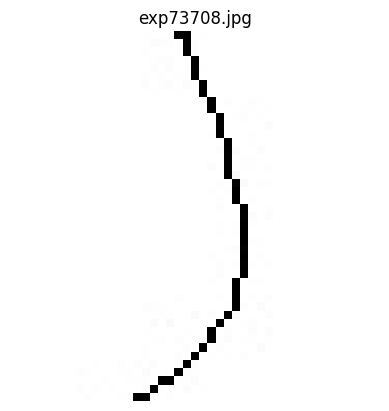

Đã lưu: /content/data1_0+-()/0/exp73708.jpg


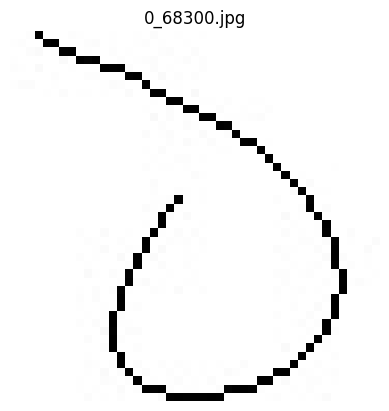

Đã lưu: /content/data1_0+-()/0/0_68300.jpg


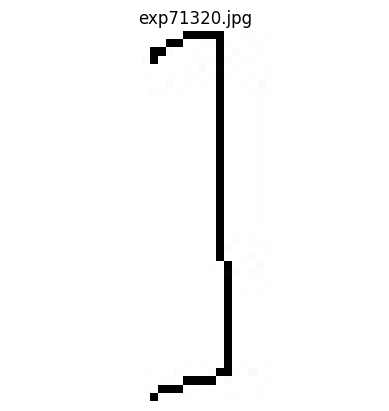

Đã lưu: /content/data1_0+-()/0/exp71320.jpg


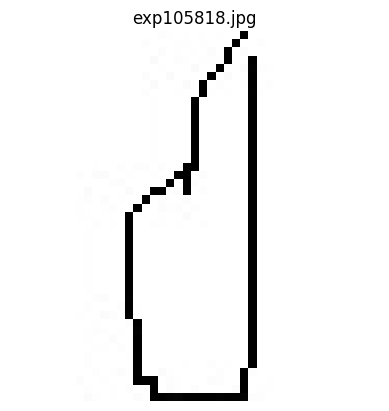

Đã lưu: /content/data1_0+-()/0/exp105818.jpg


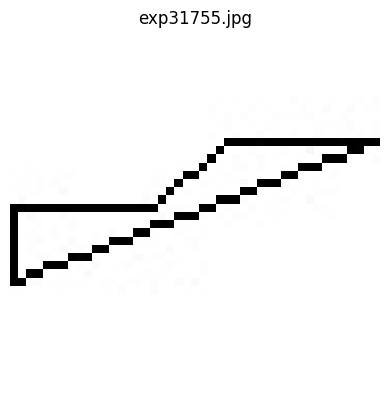

Đã lưu: /content/data1_0+-()/0/exp31755.jpg


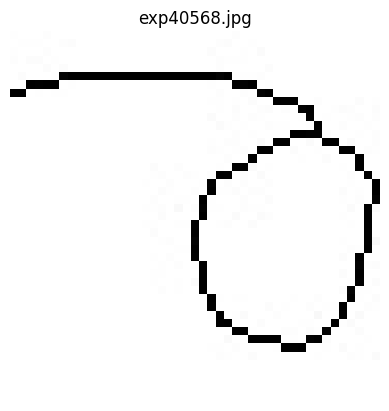

Đã lưu: /content/data1_0+-()/0/exp40568.jpg


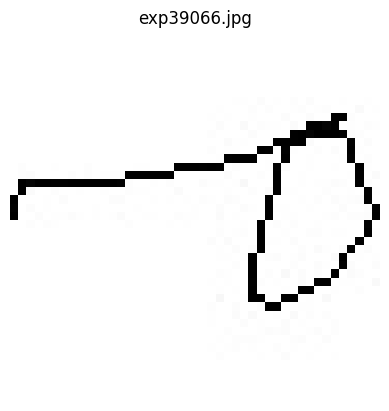

Đã lưu: /content/data1_0+-()/0/exp39066.jpg


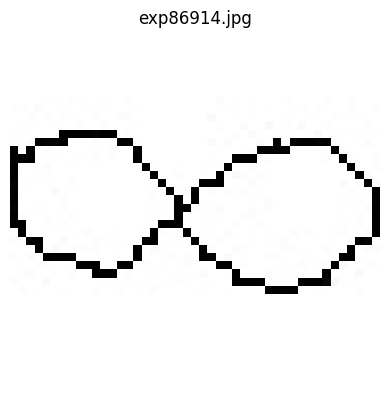

Đã lưu: /content/data1_0+-()/0/exp86914.jpg


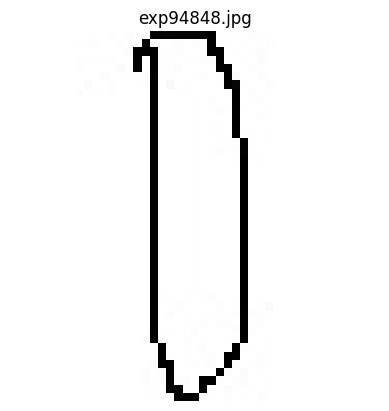

Đã lưu: /content/data1_0+-()/0/exp94848.jpg


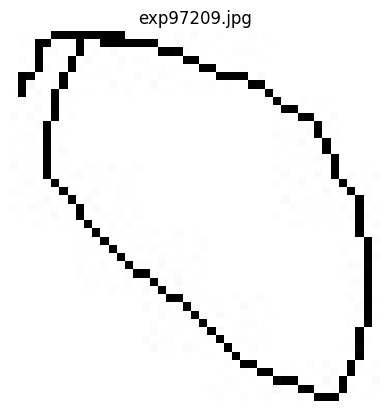

Đã lưu: /content/data1_0+-()/0/exp97209.jpg


In [ ]:
imgs, filenames = load_images_in_label_folder(r"/content/data1_0+-()/0")
outliers = find_outliers(imgs)
show_outliers(imgs, filenames, outliers, label='0', folder_path="/content/data1_0+-()/0")

In [ ]:
def delete_outliers_from_file(file_path='outliers.txt'):
    with open(file_path, 'r') as f:
        paths = [line.strip() for line in f.readlines()]

    for path in paths:
        if os.path.exists(path):
            os.remove(path)
            print(f"Đã xóa: {path}")
        else:
            print(f"Không tìm thấy: {path}")
delete_outliers_from_file()

Đã xóa: /content/data1_0+-()/0/exp84295.jpg
Đã xóa: /content/data1_0+-()/0/exp61183.jpg
Đã xóa: /content/data1_0+-()/0/exp31809.jpg
Đã xóa: /content/data1_0+-()/0/exp53871.jpg
Đã xóa: /content/data1_0+-()/0/exp91889.jpg
Đã xóa: /content/data1_0+-()/0/exp29459.jpg
Đã xóa: /content/data1_0+-()/0/exp94217.jpg
Đã xóa: /content/data1_0+-()/0/0_101685.jpg
Đã xóa: /content/data1_0+-()/0/0_36836.jpg
Đã xóa: /content/data1_0+-()/0/0_4095.jpg
Đã xóa: /content/data1_0+-()/0/0_101408.jpg
Đã xóa: /content/data1_0+-()/0/exp994.jpg
Đã xóa: /content/data1_0+-()/0/exp31813.jpg
Đã xóa: /content/data1_0+-()/0/exp60539.jpg
Đã xóa: /content/data1_0+-()/0/exp88631.jpg
Đã xóa: /content/data1_0+-()/0/exp94385.jpg
Đã xóa: /content/data1_0+-()/0/exp96353.jpg
Đã xóa: /content/data1_0+-()/0/0_7156.jpg
Đã xóa: /content/data1_0+-()/0/0_11143.jpg
Đã xóa: /content/data1_0+-()/0/exp71324.jpg
Đã xóa: /content/data1_0+-()/0/exp6416.jpg
Đã xóa: /content/data1_0+-()/0/0_111315.jpg
Đã xóa: /content/data1_0+-()/0/exp61694.j

In [ ]:
def count_images_per_label(root_folder):
    label_counts = defaultdict(int)
    for label in os.listdir(root_folder):
        label_folder = os.path.join(root_folder, label)
        if os.path.isdir(label_folder):
            label_counts[label] = len(os.listdir(label_folder))
    return label_counts

# Dùng
counts = count_images_per_label(r"/content/data1_0+-()")
for label, count in sorted(counts.items()):
    print(f"Label {label}: {count} images")


Label (: 3966 images
Label ): 3959 images
Label +: 5355 images
Label -: 5826 images
Label 0: 1739 images
Label 1: 6319 images
Label 2: 6190 images
Label 3: 2469 images
Label 4: 1640 images
Label 5: 1006 images
Label 6: 812 images
Label 7: 749 images
Label 8: 731 images
Label 9: 742 images
Label div: 157 images
Label times: 599 images


In [ ]:
import shutil

shutil.make_archive('data_cleaned', 'zip', 'data1_0+-()')

'/content/data_cleaned.zip'

In [ ]:
# @title Default title text
# json_file = open(r"/content/model_final.json", 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)

# loaded_model.load_weights(r"/content/model_final.weights.h5")
# # loaded_model = open("trained_model.p", "rb")
# model = loaded_model
# def find_suspect_images(model, data_folder):
#     wrong_preds = []

#     for label in sorted(os.listdir(data_folder)):
#         folder = os.path.join(data_folder, label)
#         if not os.path.isdir(folder): continue

#         for fname in os.listdir(folder):
#             path = os.path.join(folder, fname)
#             img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#             if img is None: continue

#             img = ~img  # đảo màu nếu cần
#             img = cv2.resize(img, (45, 45))
#             img = img / 255.0
#             img = np.expand_dims(img, axis=-1)  # shape (45, 45, 1)
#             img = np.expand_dims(img, axis=0)   # shape (1, 45, 45, 1)

#             pred = model.predict(img)
#             pred_label = str(np.argmax(pred))

#             if pred_label != label:
#                 wrong_preds.append((path, label, pred_label))

#     return wrong_preds


In [ ]:
# @title Default title text
# suspects = find_suspect_images(model, r"/content/data")

# print(" Ảnh nghi ngờ bị sai nhãn:")
# for path, actual, predicted in suspects:
#     print(f"Ảnh: {path} | Nhãn gốc: {actual} | Model đoán: {predicted}")

In [ ]:
# @title Default title text
# import matplotlib.pyplot as plt

# for path, actual, predicted in suspects:
#     img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     plt.imshow(img, cmap='gray')
#     plt.title(f"Gốc: {actual} | Dự đoán: {predicted}")
#     plt.axis('off')
#     plt.show()

#     ans = input("Xoá ảnh này? (y/n): ").strip().lower()
#     if ans == 'y':
#         os.remove(path)
#         print(f"Đã xoá {path}")


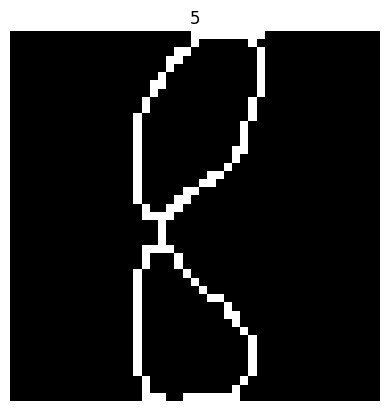

In [ ]:
img = cv2.imread(r"/content/data1_0+-()/8/8_100076.jpg", cv2.IMREAD_GRAYSCALE)

if img is not None:


      thresh1 = cv2.adaptiveThreshold(
          img, 255,
          cv2.ADAPTIVE_THRESH_MEAN_C,
          cv2.THRESH_BINARY_INV,
          blockSize=23,
          C=8
      )

      kernel_dilate = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
      kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))

      dilation = cv2.dilate(thresh1, kernel_dilate, iterations=1)
      closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel_close, iterations=1)

      thresh = cv2.ximgproc.thinning(closing)
      ctrs, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
      maxi = 0
      for c in cnt:
          x, y, w, h = cv2.boundingRect(c)
          if w * h > maxi:
              maxi = w * h
              x_max, y_max, w_max, h_max = x, y, w, h

      pad = 5
      height, width = img.shape
      x1 = max(0, x_max - pad)
      y1 = max(0, y_max - pad)
      x2 = min(width, x_max + w_max + pad)
      y2 = min(height, y_max + h_max + pad)

      im_crop = thresh[y1:y2, x1:x2]
      im_resize = cv2.resize(im_crop, (45, 45))
      plt.imshow(thresh, cmap='gray')
      plt.title(f"5")
      plt.axis('off')
      plt.show()

In [ ]:
import cv2.ximgproc

def resize_with_padding(image, target_size=(45, 45), pad_color=0):
    h, w = image.shape[:2]
    scale = min(target_size[0] / h, target_size[1] / w)
    new_w, new_h = int(w * scale), int(h * scale)
    resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_AREA)

    pad_w = (target_size[1] - new_w) // 2
    pad_h = (target_size[0] - new_h) // 2

    padded = cv2.copyMakeBorder(resized, pad_h, target_size[0] - new_h - pad_h,
                                pad_w, target_size[1] - new_w - pad_w,
                                cv2.BORDER_CONSTANT, value=pad_color)
    return padded
def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Không thể đọc ảnh: {os.path.join(folder, filename)}")
            continue
        thresh1 = cv2.adaptiveThreshold(
            img, 255,
            cv2.ADAPTIVE_THRESH_MEAN_C,
            cv2.THRESH_BINARY_INV,
            blockSize=23,
            C=8
        )

        kernel_dilate = cv2.getStructuringElement(cv2.MORPH_CROSS, (2, 2))
        kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))

        dilation = cv2.dilate(thresh1, kernel_dilate, iterations=1)
        closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel_close, iterations=1)

        thresh = cv2.ximgproc.thinning(closing)
        ctrs, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnt = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
        maxi = 0
        for c in cnt:
            x, y, w, h = cv2.boundingRect(c)
            if w * h > maxi:
                maxi = w * h
                x_max, y_max, w_max, h_max = x, y, w, h

        pad = 5
        height, width = img.shape
        x1 = max(0, x_max - pad)
        y1 = max(0, y_max - pad)
        x2 = min(width, x_max + w_max + pad)
        y2 = min(height, y_max + h_max + pad)

        im_crop = thresh[y1:y2, x1:x2]
        im_resize = resize_with_padding(im_crop, (45, 45))
        im_resize = im_resize / 255.0
        im_resize = np.expand_dims(im_resize, axis=-1)  # (45, 45, 1)

        data.append([im_resize, int(label)])
    return data

In [ ]:
import random
def load_and_split(folder, label):
    data = load_images_from_folder(folder, label)
    random.shuffle(data)
    split_idx = int(0.8 * len(data))
    return data[:split_idx], data[split_idx:]

train_data, test_data = [], []

In [ ]:
for i in range(10):
    folder_path = f"/content/data1_0+-()/{i}"
    train, test = load_and_split(folder_path, str(i))
    train_data.extend(train)
    test_data.extend(test)

In [ ]:
symbols = {
    '+': '10', '-': '11', 'times': '12',
    'div': '13', '(': '14', ')': '15'
}

for sym, label in symbols.items():
    train, test = load_and_split(f"/content/data1_0+-()/{sym}", label)
    train_data.extend(train)
    test_data.extend(test)

In [ ]:
from collections import Counter


train_labels = [label for _, label in train_data]
test_labels = [label for _, label in test_data]

train_counts = Counter(train_labels)
test_counts = Counter(test_labels)

print("Train label distribution:")
for label, count in sorted(train_counts.items()):
    print(f"Label {label}: {count} samples")

print("\nTest label distribution:")
for label, count in sorted(test_counts.items()):
    print(f"Label {label}: {count} samples")


Train label distribution:
Label 0: 1391 samples
Label 1: 5055 samples
Label 2: 4952 samples
Label 3: 1975 samples
Label 4: 1312 samples
Label 5: 804 samples
Label 6: 649 samples
Label 7: 599 samples
Label 8: 584 samples
Label 9: 593 samples
Label 10: 4284 samples
Label 11: 4660 samples
Label 12: 479 samples
Label 13: 125 samples
Label 14: 3172 samples
Label 15: 3167 samples

Test label distribution:
Label 0: 348 samples
Label 1: 1264 samples
Label 2: 1238 samples
Label 3: 494 samples
Label 4: 328 samples
Label 5: 202 samples
Label 6: 163 samples
Label 7: 150 samples
Label 8: 147 samples
Label 9: 149 samples
Label 10: 1071 samples
Label 11: 1166 samples
Label 12: 120 samples
Label 13: 32 samples
Label 14: 794 samples
Label 15: 792 samples


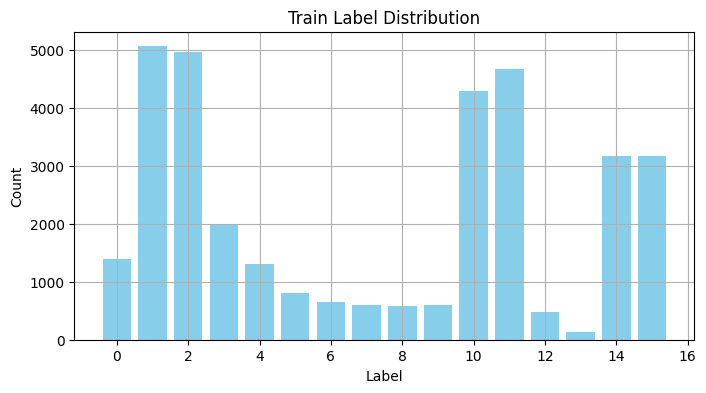

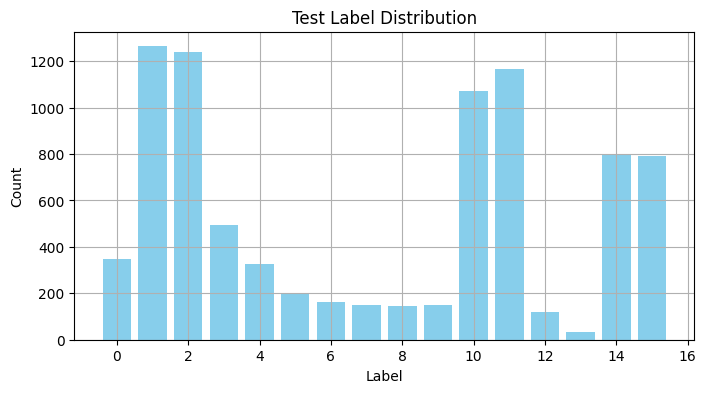

In [ ]:
import matplotlib.pyplot as plt

def plot_distribution(counter, title):
    labels = list(counter.keys())
    counts = list(counter.values())
    plt.figure(figsize=(8, 4))
    plt.bar(labels, counts, color='skyblue')
    plt.title(title)
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.grid(True)
    plt.show()

plot_distribution(train_counts, "Train Label Distribution")
plot_distribution(test_counts, "Test Label Distribution")


In [ ]:
X_train = np.array([x[0] for x in train_data])  # (num_samples, 45, 45, 1)
y_train = np.array([x[1] for x in train_data])  # (num_samples,)

X_test = np.array([x[0] for x in test_data])
y_test = np.array([x[1] for x in test_data])


np.save("X_train.npy", X_train)
np.save("y_train.npy", y_train)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

print("Đã lưu dữ liệu: X_train, y_train, X_test, y_test")
print("X_train shape:", X_train.shape)

Đã lưu dữ liệu: X_train, y_train, X_test, y_test
X_train shape: (33801, 45, 45, 1)
